## Life Cycle of Machine Learning Project


- Understanding of Problem
- Data Collection
- Data Checks/Data Understanding
- EDA
- Data Preprocessing
- Model Training
- Choose Best Model
- Model Development


## Problem Statement


#### Create a model to predict a heart disease of a patient.


In [101]:
# Data Collection

import pandas as pd # for Data Manipulation
import numpy as np # for numerical computing
import seaborn as sns  # for data visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [102]:
# loading of data, downloaded from kaggle 
df = pd.read_csv("data/heart_disease.csv")


In [103]:
#df.head() method is used to display first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,Male,non-anginal pain,125,212,absence,abnormal,168.0,absence,1.0,downsloping,2 major vessels,reversable defect,no
1,53.0,Male,non-anginal pain,140,203,presence,normal,155.0,presence,3.1,upsloping,no major vessel,reversable defect,no
2,70.0,Male,non-anginal pain,145,174,absence,abnormal,125.0,presence,2.6,upsloping,no major vessel,reversable defect,no
3,61.0,Male,non-anginal pain,148,203,absence,abnormal,161.0,absence,0.0,downsloping,1 major vessel,reversable defect,no
4,62.0,Female,non-anginal pain,138,294,presence,abnormal,106.0,absence,1.9,flat,3 major vessels,fixed defect,no


#### Data Description:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


In [5]:
# rows and columns of data 
df.shape 

(1025, 14)

In [6]:
# check missing values in the data 
df.isna().sum()

age          2
sex          3
cp           1
trestbps     0
chol         2
fbs          3
restecg      2
thalach      1
exang        0
oldpeak      1
slope        0
ca          18
thal         9
target       0
dtype: int64

In [7]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1023 non-null   float64
 1   sex       1022 non-null   object 
 2   cp        1024 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1023 non-null   object 
 5   fbs       1022 non-null   object 
 6   restecg   1023 non-null   object 
 7   thalach   1024 non-null   float64
 8   exang     1025 non-null   object 
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1007 non-null   object 
 12  thal      1016 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 112.2+ KB


In [8]:
#descriptive view of the data 
df.describe()

,age,trestbps,thalach,oldpeak
count,1023.000000,1025.000000,1024.000000,1024.000000
mean,54.521994,131.749268,149.404297,1.076367
std,9.738120,17.653472,23.878902,1.188141
min,-10.000000,94.000000,71.000000,0.000000
25%,48.000000,120.000000,132.000000,0.000000
50%,56.000000,130.000000,152.000000,0.800000
75%,61.000000,140.000000,166.000000,1.800000
max,120.000000,200.000000,300.000000,6.600000


# EDA 
- **Univariate Analysis(Single Column)**
    - Categorical Analysis(Object/string)
    - Numerical Analysis(Integer/float)

- **Bi-Variate Analysis(Two Columns)**
    - Categorical-Categoical Analysis
    - Categorical-Numerical Analysis
    - Numerical-Numerical Analysis

- **Multivariate Analysis(More Than two Columns)**



In [9]:
# target column 
df.target.value_counts()

yes    526
no     499
Name: target, dtype: int64

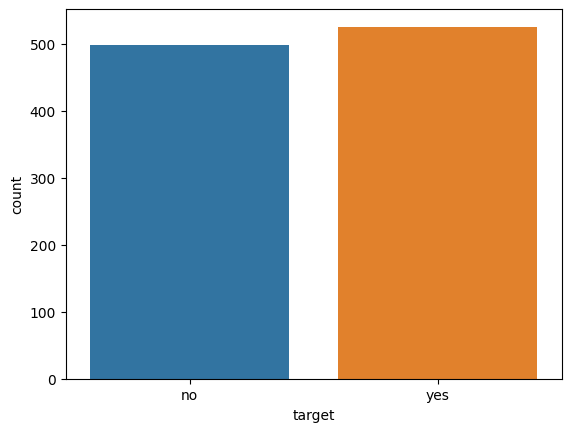

In [12]:
sns.countplot(x='target', data=df)
plt.show()

In [ ]:
# Percentage Values of Patients suffering from heart disease or no disease

#countNoDisease = 

In [13]:
countNoDisease = len(df[df.target =='no'])
countYesDisease = len(df[df.target =='yes'])

print("Percentage of Patients haven't Heart Disease: {:.2f}%".format((countNoDisease/len(df.target)*100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countYesDisease/len(df.target)*100)))


Percentage of Patients haven't Heart Disease: 48.68%
Percentage of Patients have Heart Disease: 51.32%


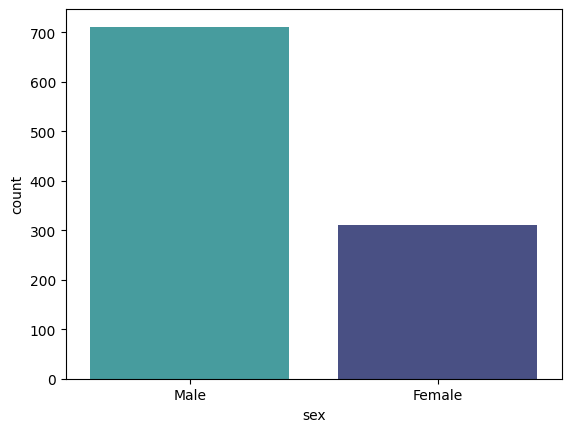

In [14]:
#analysis of sex
sns.countplot(x='sex', data=df, palette="mako_r")
plt.show()

**Observation:**     
    - Which Gender has more impact on target column?     
    - Percentage distribution of male and female? 

### Bi-Variate Analysis

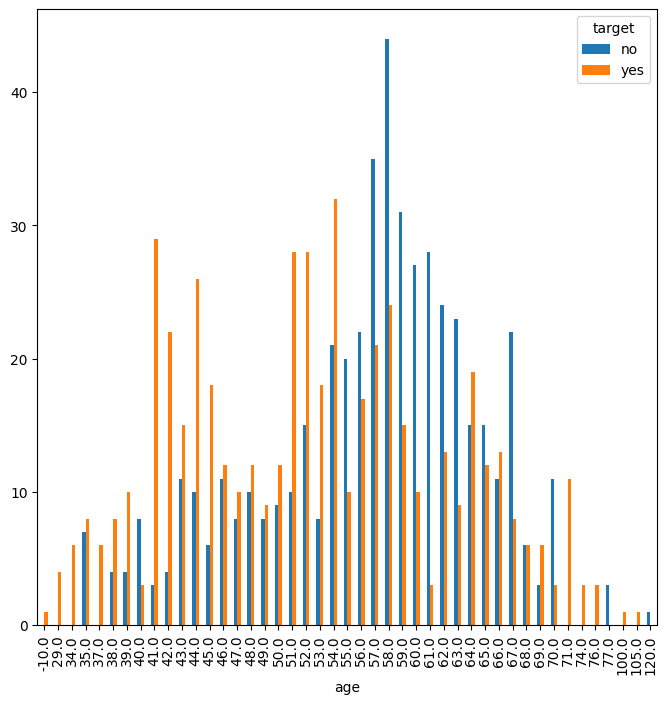

In [15]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(8,8));

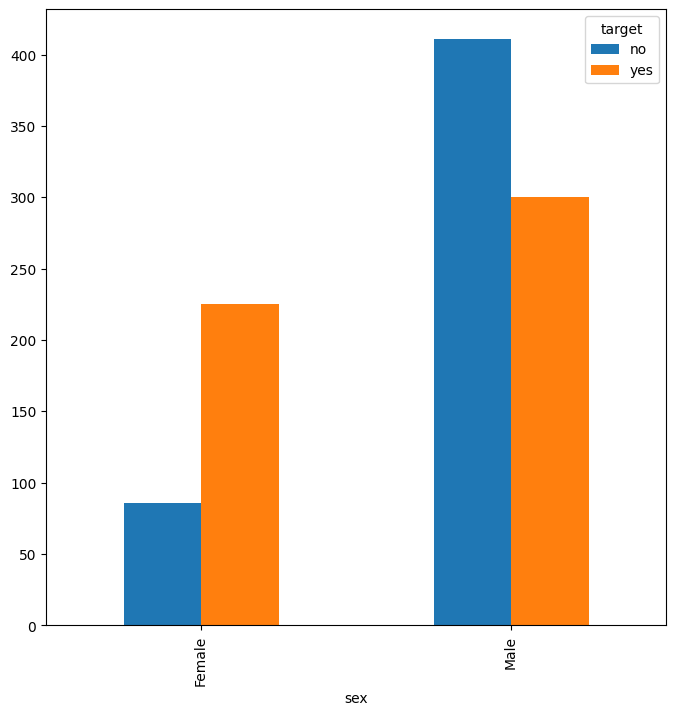

In [16]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8,8));

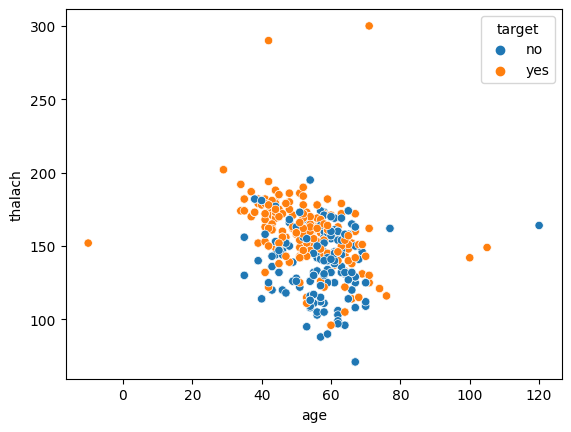

In [18]:

sns.scatterplot(x='age',y='thalach', hue='target', data=df);

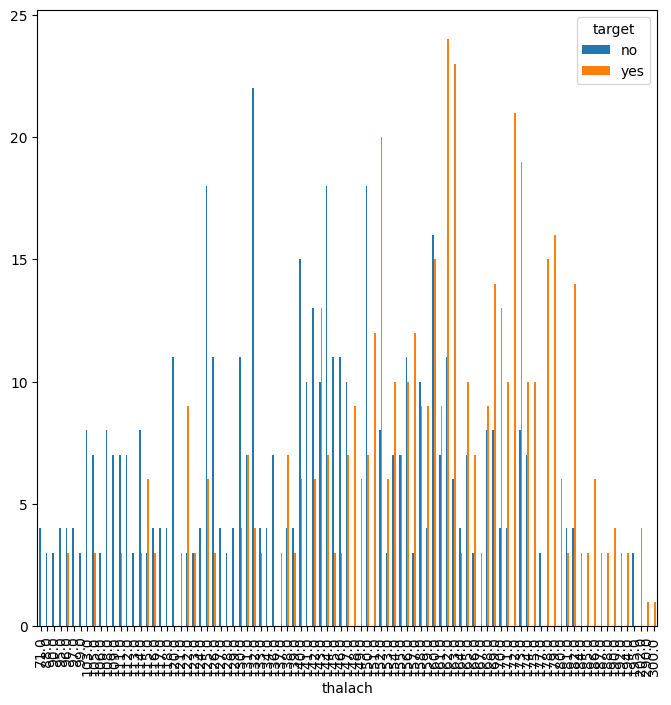

In [19]:
pd.crosstab(df.thalach, df.target).plot(kind='bar', figsize=(8,8));

In [20]:
pd.crosstab(df.cp, df.target)

target,no,yes
cp,,
asymptomatic,26,51
atypical angina,33,134
non-anginal pain,374,122
typical angina,65,219


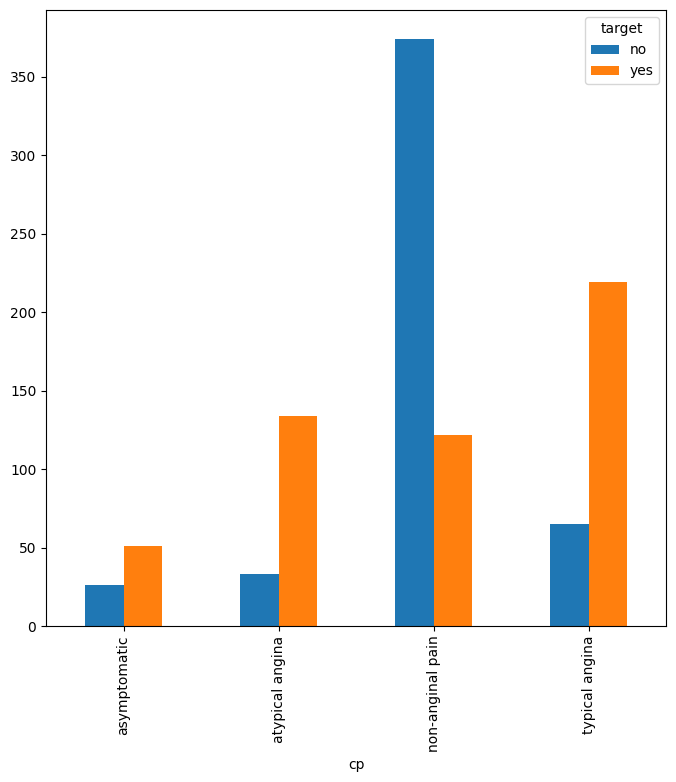

In [21]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(8,8));

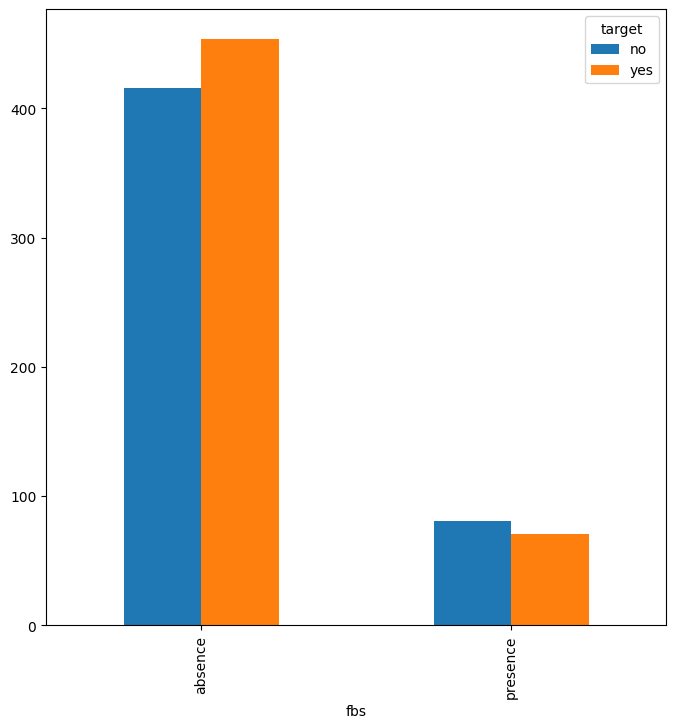

In [22]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8,8));

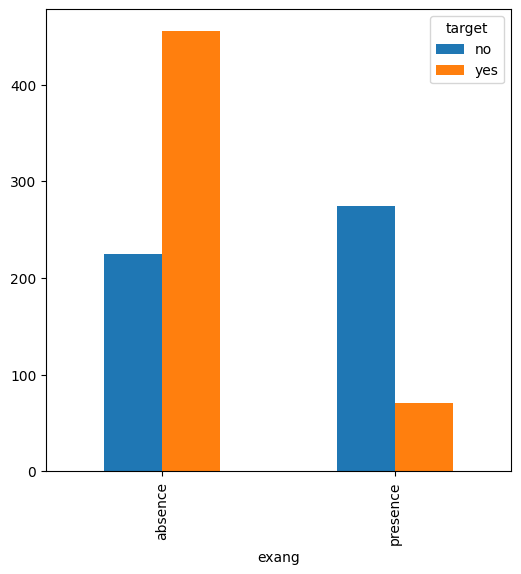

In [23]:
#exang
pd.crosstab(df.exang, df.target).plot(kind='bar', figsize=(6,6));

### Data Trasformation

In [24]:
#### handle data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1023 non-null   float64
 1   sex       1022 non-null   object 
 2   cp        1024 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1023 non-null   object 
 5   fbs       1022 non-null   object 
 6   restecg   1023 non-null   object 
 7   thalach   1024 non-null   float64
 8   exang     1025 non-null   object 
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1007 non-null   object 
 12  thal      1016 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 112.2+ KB


In [25]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,Male,non-anginal pain,125,212,absence,abnormal,168.0,absence,1.0,downsloping,2 major vessels,reversable defect,no
1,53.0,Male,non-anginal pain,140,203,presence,normal,155.0,presence,3.1,upsloping,no major vessel,reversable defect,no
2,70.0,Male,non-anginal pain,145,174,absence,abnormal,125.0,presence,2.6,upsloping,no major vessel,reversable defect,no


In [26]:
#df.cp.value_counts()

In [27]:
df.chol


0           212
1           203
2           174
3           203
4           294
         ...   
1020        NaN
1021        258
1022        275
1023    nothing
1024        188
Name: chol, Length: 1025, dtype: object

In [28]:
#unkown, nothing, everyone

string1="212"

In [31]:
string1.isdigit()

True

In [32]:
string2="nothing"
string2.isdigit()

False

In [130]:
column_name = 'chol'
column_name

'chol'

In [131]:
~df[column_name].astype(str).str.isdigit() | df[column_name].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021    False
1022    False
1023     True
1024    False
Name: chol, Length: 1025, dtype: bool

In [132]:
df.loc[~df[column_name].astype(str).str.isdigit() | df[column_name].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
121,44.0,Male,non-anginal pain,120,NaN,absence,abnormal,144.0,presence,2.8,upsloping,no major vessel,normal,0
1020,59.0,Male,atypical angina,140,NaN,absence,abnormal,164.0,presence,0.0,downsloping,no major vessel,fixed defect,1
1023,50.0,Female,non-anginal pain,110,nothing,absence,normal,159.0,absence,0.0,downsloping,no major vessel,fixed defect,1


In [133]:
#mood of the column
value = df.chol.mode()[0]

df.chol.replace({'nothing':value}, inplace=True)

In [134]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59.0,Male,atypical angina,140,NaN,absence,abnormal,164.0,presence,0.0,downsloping,no major vessel,fixed defect,1
1021,60.0,Male,non-anginal pain,125,258,absence,normal,141.0,presence,2.8,flat,1 major vessel,reversable defect,0
1022,47.0,Male,non-anginal pain,110,275,absence,normal,118.0,presence,1.0,flat,1 major vessel,fixed defect,0
1023,50.0,Female,non-anginal pain,110,204,absence,normal,159.0,absence,0.0,downsloping,no major vessel,fixed defect,1
1024,54.0,Male,non-anginal pain,120,188,absence,abnormal,113.0,absence,1.4,flat,1 major vessel,reversable defect,0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1023 non-null   float64
 1   sex       1022 non-null   object 
 2   cp        1024 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1023 non-null   object 
 5   fbs       1022 non-null   object 
 6   restecg   1023 non-null   object 
 7   thalach   1024 non-null   float64
 8   exang     1025 non-null   object 
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1007 non-null   object 
 12  thal      1016 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 112.2+ KB


In [136]:
# convert data-type from object to float
df.chol = df.chol.astype('float')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1023 non-null   float64
 1   sex       1022 non-null   object 
 2   cp        1024 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1023 non-null   float64
 5   fbs       1022 non-null   object 
 6   restecg   1023 non-null   object 
 7   thalach   1024 non-null   float64
 8   exang     1025 non-null   object 
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1007 non-null   object 
 12  thal      1016 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 112.2+ KB


## Handling Outliers

In [42]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,Male,non-anginal pain,125,212.0,absence,abnormal,168.0,absence,1.0,downsloping,2 major vessels,reversable defect,no
1,53.0,Male,non-anginal pain,140,203.0,presence,normal,155.0,presence,3.1,upsloping,no major vessel,reversable defect,no


In [43]:
numeric_columns = df.select_dtypes(include=np.number)
numeric_columns

,age,trestbps,chol,thalach,oldpeak
0,52.0,125,212.0,168.0,1.0
1,53.0,140,203.0,155.0,3.1
2,70.0,145,174.0,125.0,2.6
3,61.0,148,203.0,161.0,0.0
4,62.0,138,294.0,106.0,1.9
...,...,...,...,...,...
1020,59.0,140,NaN,164.0,0.0
1021,60.0,125,258.0,141.0,2.8
1022,47.0,110,275.0,118.0,1.0
1023,50.0,110,204.0,159.0,0.0


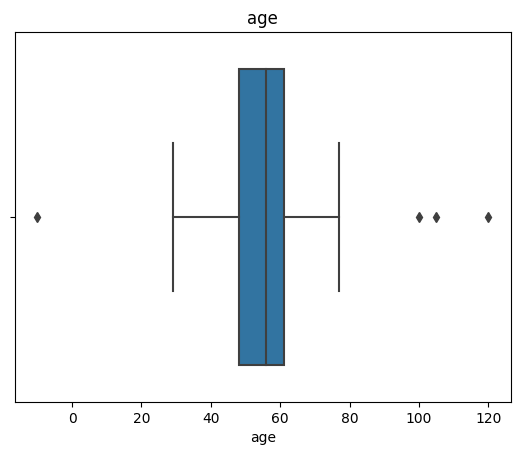

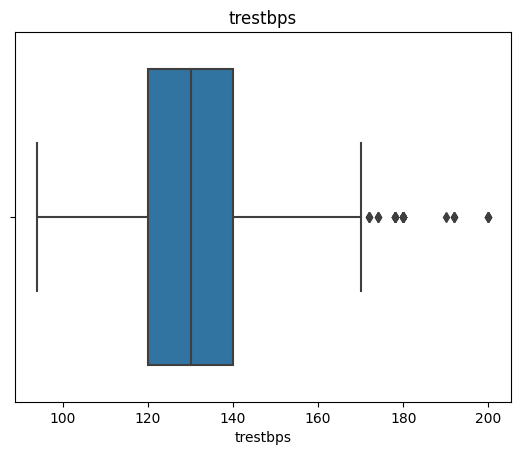

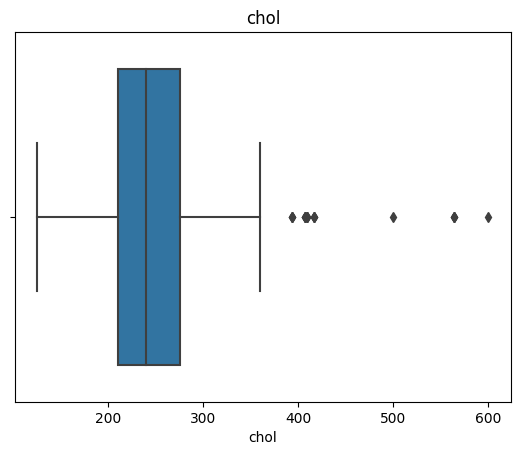

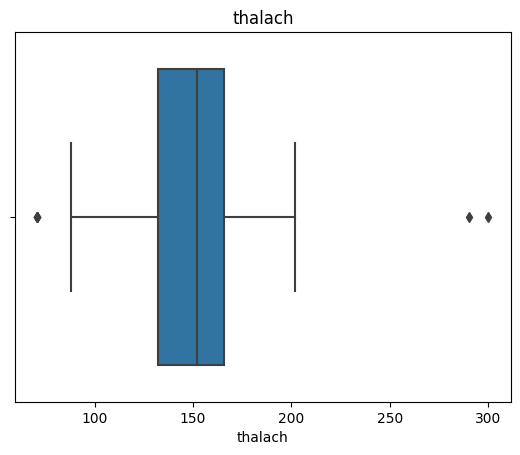

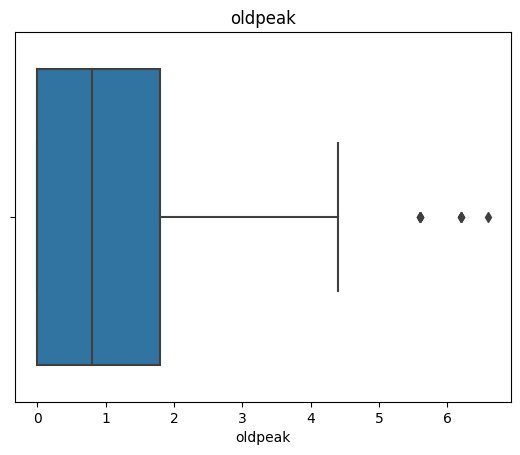

In [44]:
#boxplot to detect outliers

for i in numeric_columns.columns:
    sns.boxplot(x=i, data=numeric_columns)
    plt.title(f"{i}")
    plt.show()

In [45]:
#skewness to detect outliers

numeric_columns.skew()

age         0.021636
trestbps    0.758634
chol        1.329177
thalach    -0.048132
oldpeak     1.258772
dtype: float64

## Feature Engineering
- Handling Outliers
- Handling Categorical Features
- Handling Missing values
- Feature scaling
- Feature extraction and combining

In [ ]:
#numeric_columns.corr()

In [129]:
#encoding of target column
def modify_target(x):
    if x=='yes':
        return 1
    else:
        return 0

df.target = df.target.apply(modify_target)

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,Male,non-anginal pain,125,212.0,absence,abnormal,168.0,absence,1.0,downsloping,2 major vessels,reversable defect,0
1,53.0,Male,non-anginal pain,140,203.0,presence,normal,155.0,presence,3.1,upsloping,no major vessel,reversable defect,0
2,70.0,Male,non-anginal pain,145,174.0,absence,abnormal,125.0,presence,2.6,upsloping,no major vessel,reversable defect,0
3,61.0,Male,non-anginal pain,148,203.0,absence,abnormal,161.0,absence,0.0,downsloping,1 major vessel,reversable defect,0
4,62.0,Female,non-anginal pain,138,294.0,presence,abnormal,106.0,absence,1.9,flat,3 major vessels,fixed defect,0


In [179]:
#features and target


features = df.drop(columns='target')
target = df['target']

In [180]:

from sklearn.model_selection import train_test_split

# Pipeline to create a pipeline
from sklearn.pipeline import Pipeline

# SimpleImputer to handle missing values
from sklearn.impute import SimpleImputer

# StandardScalr for scaling of numerical columns
# OneHotEncoder for encding of categorical columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder, LabelEncoder

#columnTransformer to bind all the transformers in a single pipeline
from sklearn.compose import ColumnTransformer



In [181]:



# train test split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2,random_state= 42 )

In [182]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [183]:
# separate numerical columns and categorical columns

num_columns = numeric_columns.columns.to_list() 
cat_columns = df.select_dtypes(exclude=np.number).columns.to_list()
cat_columns,num_columns

(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

In [184]:
#for numeric columns

numeric_transformer = Pipeline(steps=[
    ('numeric_imputer', SimpleImputer(strategy='median')),
    ('scaling', RobustScaler())
])




#for categorical columns 
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [185]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns),
    ])


In [186]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


In [187]:
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

### Save Model Pipeline

In [188]:
import joblib
joblib.dump(pipeline, "model/preprocessor.pkl")

['model/preprocessor.pkl']

### Model Building

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [190]:
# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier()
]



In [191]:
# Iterate over the classifiers
for classifier in classifiers:
    classifier.fit(X_train_transformed, y_train)

    # Predict the target variable for the training and testing data
    train_predictions = classifier.predict(X_train_transformed)
    test_predictions = classifier.predict(X_test_transformed)

    # Evaluate the performance of the model using classification metrics
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Print the classification metrics
    print("Classifier:", classifier.__class__.__name__)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("----------------------")
    print('='*35)
    print('\n')

Classifier: LogisticRegression
Train Accuracy: 0.8841463414634146
Test Accuracy: 0.8195121951219512
Precision: 0.7796610169491526
Recall: 0.8932038834951457
F1 Score: 0.8325791855203619
----------------------


Classifier: KNeighborsClassifier
Train Accuracy: 0.9439024390243902
Test Accuracy: 0.8341463414634146
Precision: 0.8108108108108109
Recall: 0.8737864077669902
F1 Score: 0.8411214953271028
----------------------


Classifier: DecisionTreeClassifier
Train Accuracy: 1.0
Test Accuracy: 0.975609756097561
Precision: 0.99
Recall: 0.9611650485436893
F1 Score: 0.9753694581280788
----------------------


Classifier: GaussianNB
Train Accuracy: 0.7207317073170731
Test Accuracy: 0.6829268292682927
Precision: 0.61875
Recall: 0.9611650485436893
F1 Score: 0.7528517110266161
----------------------


Classifier: SVC
Train Accuracy: 0.9536585365853658
Test Accuracy: 0.8731707317073171
Precision: 0.8290598290598291
Recall: 0.941747572815534
F1 Score: 0.8818181818181818
----------------------


Clas

### Model Interpretation 

In [192]:
classifiers = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'SVC', 'RandomForestClassifier', 'AdaBoostClassifier', 'BaggingClassifier']
train_accuracy = [0.884, 0.944, 1.0, 0.721, 0.954, 1.0, 0.934, 1.0]
test_accuracy = [0.82, 0.834, 0.976, 0.683, 0.873, 0.985, 0.839, 0.98]


data = {'Classifier': classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
new_df = pd.DataFrame(data)
new_df

,Classifier,Train Accuracy,Test Accuracy
0,LogisticRegression,0.884,0.820
1,KNeighborsClassifier,0.944,0.834
2,DecisionTreeClassifier,1.000,0.976
3,GaussianNB,0.721,0.683
4,SVC,0.954,0.873
5,RandomForestClassifier,1.000,0.985
6,AdaBoostClassifier,0.934,0.839
7,BaggingClassifier,1.000,0.980


In [193]:
new_df.set_index('Classifier', inplace=True)


In [194]:
new_df

,Train Accuracy,Test Accuracy
Classifier,,
LogisticRegression,0.884,0.820
KNeighborsClassifier,0.944,0.834
DecisionTreeClassifier,1.000,0.976
GaussianNB,0.721,0.683
SVC,0.954,0.873
RandomForestClassifier,1.000,0.985
AdaBoostClassifier,0.934,0.839
BaggingClassifier,1.000,0.980


In [195]:
best_model = new_df['Test Accuracy'].idxmax()
best_model

'RandomForestClassifier'

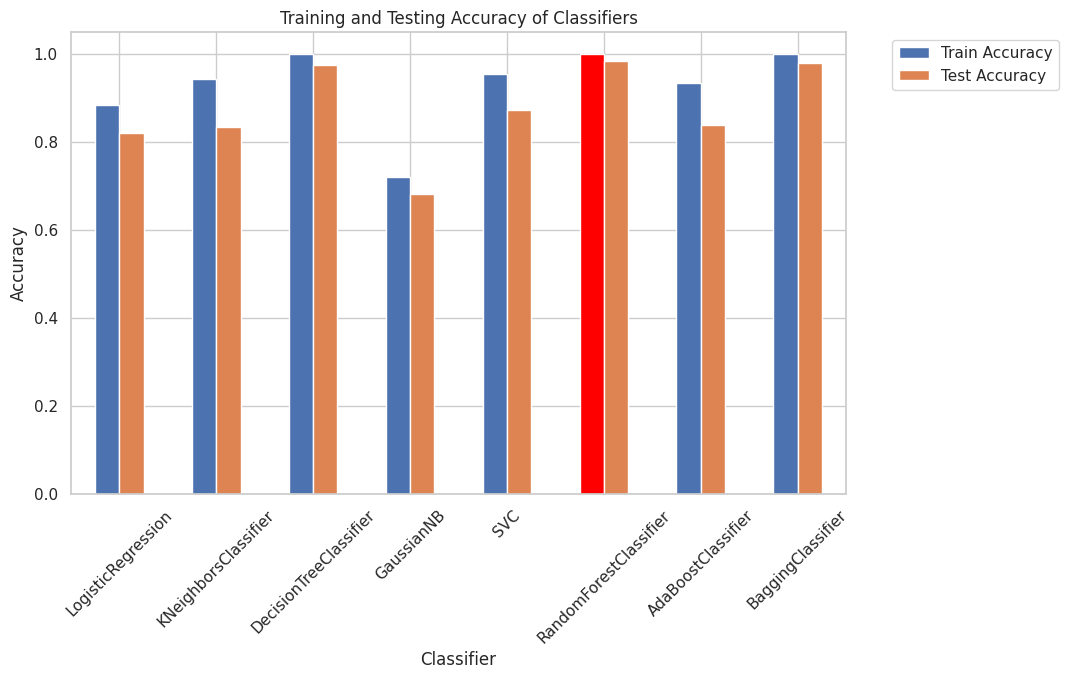

In [196]:
sns.set(style='whitegrid')
ax = new_df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy of Classifiers')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.patches[new_df.index.get_loc(best_model)].set_facecolor('red')

plt.show()


### Getting Prediction on new data

In [197]:
best_Model = RandomForestClassifier()
best_Model.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [198]:
#save model
import joblib

joblib.dump(best_Model, 'model/Classification_model.pkl')


['model/Classification_model.pkl']

In [165]:
#new data
new_user_data = pd.DataFrame(data={
    'age': 45,
    'sex': 'Male',
    'cp': 'typical angina',
    'trestbps': 120,
    'chol': 200,
    'fbs': 'presence',
    'restecg': 'abnormal',
    'thalach': 150,
    'exang': 'absence',
    'oldpeak': 1.5,
    'slope': 'upsloping',
    'ca': '3 major vessels',
    'thal': 'fixed defect'
}, index=[0])


new_user_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,Male,typical angina,120,200,presence,abnormal,150,absence,1.5,upsloping,3 major vessels,fixed defect


In [161]:
new_transformed_data = pipeline.transform(new_user_data)

In [168]:
result = best_Model.predict(new_transformed_data)[0]

In [169]:
if result==1:
    print("This Patient is suffering from heart disease")
else:
    print("This Patient is not suffering from heart disease")

This Patient is suffering from heart disease
